# CMSC471 - Artificial Intelligence - Fall 2020  
## Instructor: Fereydoon Vafaei
# <font color="blue"> Assignment 4: Classification</font>

Sam Bailor - VK96692

## Overview and Learning Objectives

You've learned very important and fundamental concepts in ML so far. This assignment will take your understanding to the next level by some insightful hands-on exercises. What you practice in this assignment are critical ML skills.</b>

In this assignment, you are going to build and compare three classifiers applied on South African Heart Disease dataset from the book: ["Elements of Statistical Learning"](https://web.stanford.edu/~hastie/ElemStatLearn/) by T. Hastie, R. Tibshirani, and J. Friedman.

**AI/Machine Learning in Healthcare** is currently one of the trend application domains of ML. According to [ReportLinker](https://www.reportlinker.com/p05251483/Global-AI-in-Healthcare-Market-Report-for.html), "spending on this category is forecasted to jump from \\$2.1 billion to \\$36.1 billion by 2025. This is a 50.2% Compound Annual Growth Rate (CAGR)."

<b>Note: </b>As you work through this assignment, you are recommended to check the textbook examples, notebooks and sklearn documentations. Some outputs are provided to you as reference, and some others are NOT provided intentionally. You should NOT share any plot, solution or code in Piazza.

Pedagogically, this assignment will help you:
- better understand classification.

- getting started with scikit-learn and its built-in methods, as well as implemented classification models.

- practice data preprocessing.

- practice model evaluation using performance metrics and cross validation.

- learn how to plot ROC curves.

## Classification

You are going to build three classifiers from sklearn to predict heart disease. First, download [the data](https://github.com/fereydoonvafaei/CMSC471-Fall2020/blob/master/SAheart.csv) and save it in your working directory. Also, import necessary Python and sklearn modules.

In [1]:
# Import necessary modules
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## <font color="red"> Required Coding

> Next, load the data with pandas. The data (csv file) should be stored in the same working directory as your notebook.

In [2]:
heart_data = pd.read_csv("SAheart.csv")

In [3]:
print(heart_data.shape)
heart_data.head()

(462, 11)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Some description about the features from the data source:

> "A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal." 

        sbp	        systolic blood pressure
        tobacco		cumulative tobacco (kg)
        ldl		    low densiity lipoprotein cholesterol
        adiposity
        famhist		family history of heart disease (Present, Absent)
        typea		  type-A behavior
        obesity
        alcohol		current alcohol consumption
        age		    age at onset
        chd		    label, coronary heart disease


In [4]:
# The first column, row.names is useless for this ML task, drop it!

heart_data = heart_data.drop(columns=["row.names"])
print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
# Get the feature data types.
heart_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

> Next, you need to convert `famhist` from categorical (Present/Absent) to numerical {0,1} for further processing in classifier.

In [6]:
# Convert 'famhist' to pd.Categorical and then use .cat.codes to convert the values to [0,1] ~2 lines
# Hint: There might be other ways to do this using pandas dataframe methods.
# Make sure your output looks exactly like the dataframe head below, i.e. famhist values are converted to {0,1}.

heart_data["famhist"] = heart_data.famhist.astype('category').cat.codes
print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [7]:
type(heart_data["famhist"][0])

numpy.int8

In [8]:
# Create X, y 
# Notice that X should contain all the features (columns) except 'chd'
# y should only include 'chd' because it's the target label!
X = heart_data[["sbp", "tobacco", "ldl", "adiposity", "famhist", "typea", "obesity", "alcohol", "age"]]
y = heart_data["chd"]

print(X.shape)
print(y.shape)

(462, 9)
(462,)


> Next, split the data with a test size of 0.33

In [9]:
# Split the data to train and test using train_test_split method with test_size=0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(309, 9)
(309,)
(153, 9)
(153,)


> Next, build the classifiers.


> **Required mean cv score**: You should get at least **0.75 mean cv score** for all three classifiers (0.75 would be the rounded value with two decimal points). You may begin with the default hyperparameter values; however, you should fine-tune them accordingly to satisfy the minimum mean cv score requirement.


> You may check out scikit-learn documentations to see what hyperparameters are available for each classifier: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [Linear SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

> **Note:** Whenever you perform cross validation, you apply the method on the whole X, whereas when you use `.fit()` method, you apply it on X_train only.

In [10]:
# Create a LogisticRegression with a 'liblinear' solver
logreg_clf = LogisticRegression(random_state=0, solver='liblinear')

# Perform a 10-fold cross validation with scoring='roc_auc'
# Hint: cross validation should be done on the whole X
logreg_cv_score = cross_val_score(logreg_clf, X, y, cv=10, scoring='roc_auc')

print("Mean CV Score - Logistic Regression: ", logreg_cv_score.mean())

Mean CV Score - Logistic Regression:  0.761518817204301


In [11]:
# Create a Linear SVM Classifier using LinearSVC()
svm_clf = LinearSVC(random_state=0, max_iter=6000)

# Perform a 10-fold cross validation with scoring='roc_auc'
svm_cv_score = cross_val_score(svm_clf, X, y, cv=10, scoring='roc_auc')

print("Mean CV Score - Linear SVM: ", svm_cv_score.mean())

Mean CV Score - Linear SVM:  0.760497311827957


In [12]:
# Create a RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0, max_samples=0.1)

# Perform a 10-fold cross validation with scoring 'roc_auc'
rf_cv_score = cross_val_score(rf_clf, X, y, cv=10, scoring='roc_auc')

print("Mean CV Score - Random Forest: ", rf_cv_score.mean())

Mean CV Score - Random Forest:  0.7509375


> Next, you're going to fine-tune your rf classifier solely based on `n_estimators` hyperparameter. Depending on your computer speed, running this cell may take a while. Follow the comments in the following cell carefully, and plot the impact of n_estimators on mean cv scores. You're going to perform 10-fold cross validation. cv `scoring` will still be `roc_auc`. **Incomplete plots will get ZERO credit!**

Text(0, 0.5, 'rf_mean_cv_scores')

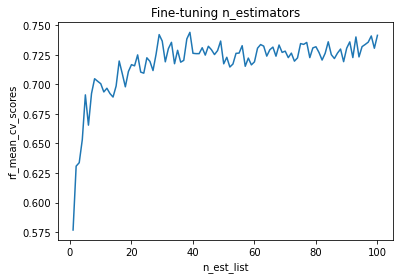

In [13]:
# Now fine-tune n_estimators hyperparameter as follows:

# 1- Write a for loop that iterates over n_estimators from 1 to 100
# 2- In each iteration, do 10-fold cv and calculate rf_cv_score.mean()
# and append it to the list rf_mean_cv_scores
# 3- Finally, plot rf_mean_cv_scores on y-axis versus n_est_list on x-axis
# Your plot should have the title "Fine-tuning n_estimators", and proper label for each axis

# Incomplete plots will get ZERO credit!
# Running this cell may take a while.

rf_mean_cv_scores = []
n_est_list = []
for n_estimators in range(1,101):
    # Create a RandomForestClassifier
    rf_clf = RandomForestClassifier(n_estimators)

    # Perform a 10-fold cross validation with scoring 'roc_auc'
    rf_cv_score = cross_val_score(rf_clf, X, y, cv=10, scoring='roc_auc')
    
    rf_mean_cv_scores.append(rf_cv_score.mean())
    n_est_list.append(n_estimators)

plt.plot(n_est_list, rf_mean_cv_scores)
plt.title("Fine-tuning n_estimators")
plt.xlabel("n_est_list")
plt.ylabel("rf_mean_cv_scores")

In [14]:
# Fit the rf_clf on the training set
rf_clf.fit(X_train, y_train)

# Get feature_importances of rf for all features
for name, score in zip(heart_data, rf_clf.feature_importances_):
    print(name, score)

sbp 0.11926918707857663
tobacco 0.14990519292837728
ldl 0.14432230498121854
adiposity 0.12404173853157666
famhist 0.026400979370957398
typea 0.08888020445715339
obesity 0.12180527459804319
alcohol 0.09397137669240574
age 0.13140374136169122


The provided code in the following cells show how you can plot ROC curve using fpr, tpr, and threshold returned by `metrics.roc_curve` and class probabilities using `predict_proba()` method. Notice that some classifiers don't have `predict_proba()`, and in that case you can use `decision_function()` method to get the scores.

In [15]:
# Get class probabilities, fpr, tpr and threshold for random forest.
rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

Text(0.5, 0, 'False Positive Rate')

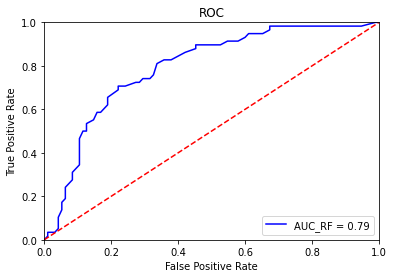

In [16]:
# Plot ROC curve.
plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

> Now, Plot ROC for all three classifiers in ONE plot with different colors, and with AUC scores shown on the `'lower right'` of the plot for each classifier.

## <font color="red"> Required Coding

In [17]:
# Fit the svm_clf and logreg_clf on the training set
svm_clf.fit(X_train, y_train)
logreg_clf.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

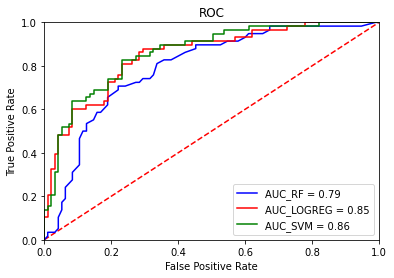

In [18]:
# Plot ROC for all three classifiers with different colors in one plot,
# and with AUC scores shown on the 'lower right' of the plot.
# Plot ROC curve.

# Plot should have title and axis lables.
plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Hint1: You may use the code for random forest ROC curve,
# and use different names for different variables of each classifier.

# Get class probabilities, fpr, tpr and threshold for random forest.
rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

# Get class probabilities, fpr, tpr and threshold for logistic regression.
logreg_probs = logreg_clf.predict_proba(X_test)
logreg_preds = logreg_probs[:,1]
logreg_fpr, logreg_tpr, logreg_threshold = metrics.roc_curve(y_test, logreg_preds)
logreg_roc_auc = metrics.auc(logreg_fpr, logreg_tpr)

# Hint2: LinearSVC doesn't have predict_proba() method,
# instead, you should directly use decision_function() method to compute svm_preds

# Get class probabilities, fpr, tpr and threshold for svm classifier.
svm_preds = svm_clf.decision_function(X_test)
svm_fpr, svm_tpr, svm_threshold = metrics.roc_curve(y_test, svm_preds)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.plot(logreg_fpr, logreg_tpr, 'r', label = 'AUC_LOGREG = %0.2f' % logreg_roc_auc)
plt.plot(svm_fpr, svm_tpr, 'g', label = 'AUC_SVM = %0.2f' % svm_roc_auc)

plt.legend(loc = 'lower right')

## Classification Questions

Answer the following questions HERE:

**Q1 (5 points)** - Which classifier has a better performace according to ROC curves above? Which one is the 2nd best according to ROC plot?

**Q1 Answer** - According to my current ROC plot (which is subject to change if re-created due to randomization), SVM Classification has the best performance and Logistic Regression has the second best performance.


**Q2 (5 points)** - What is the most important feature of this dataset for the random forest classifier? <b>Hint:</b> Check back the previous cells where you get them!

**Q2 Answer** - The random forest classifier's very useful "feature_importances_" method displays tobacco as the most important feature, with ldl being a close second.

**Q3 (5 points)** - According to the fine-tuning plot of `n_estimators`, what is an appropriate range for `n_estimators`. You should GIVE A COMPLETE ANSWER based on your plot results, and make reasonable arguments. Incomplete answers will get ZERO credit!

**Q3 Answer** - I have created the n_estimators plot multiple times to see how the randomization creates varying plots, and typically the best results are from range 20-100. However, the higher the n_estimators the longer the processing time. So it could be reasonable to decrease the upper limit of the range if processing time was a major factor.

## Grading

Assignment 4 has a maximum of 100 points. Make sure that you get the correct outputs and plots for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Classification implementaion has 85 points:
- 15 points: data preprocessing.
- 30 points: 3 classifiers - each classifier (and cv) implementation has 10 points. Mean cv score must be at least 0.75 to get points! Otherwise grade will be zero!
- 20 points: n_estimators fine-tuning plot.
- 20 points: correct plot of 3 ROC for 3 classifiers in one plot with different colors with title and axis labels.

Classification questions have 15 points (5 points each).

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

## Submission

Name your notebook ```Lastname-A4.ipynb```. Submit the file using the ```Assignment-4``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct results and plots, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Friday November 27th, 11:59PM.</b></font>